In [1]:
%pip install yfinance 
%pip install pandas-ta
! pip install pillow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [13]:
! pip install keras
! pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 2.9 MB/s eta 0:00:00m eta 0:00:010:00:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 KB 1.6 MB/s eta 0:00:002.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 2.0 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 1.5 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 2.4 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 2.4 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 KB 3.1 MB/s eta 0:00:00 MB/s eta 0:00:01
  Using cached wheel-0.44.0-py3-none-any.whl (67 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 KB 3.2 MB/s eta 0:00:00 MB/s eta 0:00

In [1]:
! pip install pandas-ta

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import yfinance as yf
from numpy import nan as npNaN
import pandas_ta as ta
from sklearn.preprocessing import MinMaxScaler


In [3]:
data = yf.download(tickers="NVDA" , start = '2012-03-11', end ='2024-04-11')
data.head(10)
data = data.dropna()


[*********************100%***********************]  1 of 1 completed


In [4]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-03-12,0.372000,0.374500,0.363750,0.364750,0.334559,299948000
2012-03-13,0.366250,0.371750,0.364500,0.369750,0.339145,553288000
2012-03-14,0.369750,0.370500,0.358000,0.359250,0.329514,735708000
2012-03-15,0.360250,0.366500,0.359000,0.364500,0.334329,382380000
2012-03-16,0.364750,0.366500,0.362750,0.365000,0.334788,428340000
...,...,...,...,...,...,...
2024-04-04,90.405998,90.634003,85.879997,85.904999,85.897942,434965000
2024-04-05,86.865997,88.481003,85.926003,88.008003,88.000778,399678000
2024-04-08,88.699997,88.830002,86.732002,87.133003,87.125847,283220000


In [5]:
# add indicators: 

data['RSI'] = ta.rsi(data.Close, length=15)
data['EMAF'] = ta.ema(data.Close, length=20)
data['EMAM'] = ta.ema(data.Close, length = 100)
data['EMS'] = ta.ema(data.Close, length = 150)

data['Target'] = data['Adj Close']-data.Open
data['Target'] = data['Target'].shift(-1)

data['TargetClass'] = [1 if data.Target[i] > 0 else 0 for i in range (len(data))]
data['TargetNextClose'] = data['Adj Close'].shift(-1)
data.dropna(inplace=True)
data.reset_index(inplace=True)
data.drop(['Volume' ,'Close', 'Date'], axis = 1, inplace=True)

/tmp/ipykernel_95959/2538033129.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['TargetClass'] = [1 if data.Target[i] > 0 else 0 for i in range (len(data))]


In [6]:
data

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMS,Target,TargetClass,TargetNextClose
0,0.319750,0.320750,0.316000,0.292137,38.260868,0.331486,0.338094,0.336322,-0.026636,0,0.289614
1,0.316250,0.318750,0.313750,0.289614,36.754218,0.329988,0.337651,0.336049,-0.022967,0,0.293283
2,0.316250,0.320000,0.312500,0.293283,40.411116,0.329013,0.337297,0.335833,-0.020732,0,0.301768
3,0.322500,0.330000,0.319500,0.301768,47.878096,0.329011,0.337133,0.335743,-0.025525,0,0.299475
4,0.325000,0.328000,0.321750,0.299475,46.201615,0.328772,0.336922,0.335620,-0.030862,0,0.294888
...,...,...,...,...,...,...,...,...,...,...,...
2885,88.484001,90.374001,88.400002,88.956688,57.152639,88.436409,69.085995,62.245015,-4.508057,0,85.897942
2886,90.405998,90.634003,85.879997,85.897942,50.116979,88.195322,69.419045,62.558393,1.134781,1,88.000778
2887,86.865997,88.481003,85.926003,88.000778,54.264129,88.177482,69.787143,62.895474,-1.574150,0,87.125847
2888,88.699997,88.830002,86.732002,87.125847,52.324868,88.078008,70.130626,63.216500,-2.095016,0,85.346985


In [7]:
data_set = data.iloc[:, 0:11]
pd.set_option('display.max_columns', None)

data_set.head(5)

,Open,High,Low,Adj Close,RSI,EMAF,EMAM,EMS,Target,TargetClass,TargetNextClose
0,0.31975,0.32075,0.31600,0.292137,38.260868,0.331486,0.338094,0.336322,-0.026636,0,0.289614
1,0.31625,0.31875,0.31375,0.289614,36.754218,0.329988,0.337651,0.336049,-0.022967,0,0.293283
2,0.31625,0.32000,0.31250,0.293283,40.411116,0.329013,0.337297,0.335833,-0.020732,0,0.301768
3,0.32250,0.33000,0.31950,0.301768,47.878096,0.329011,0.337133,0.335743,-0.025525,0,0.299475
4,0.32500,0.32800,0.32175,0.299475,46.201615,0.328772,0.336922,0.335620,-0.030862,0,0.294888


In [8]:
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[3.40087110e-04 3.08930413e-04 3.99544266e-04 ... 6.61564828e-01
  0.00000000e+00 3.02569572e-04]
 [3.03462190e-04 2.88335011e-04 3.75410558e-04 ... 6.61884588e-01
  0.00000000e+00 3.41297423e-04]
 [3.03462190e-04 3.01207099e-04 3.62003050e-04 ... 6.62079335e-01
  0.00000000e+00 4.30858940e-04]
 ...
 [9.05978985e-01 9.08155005e-01 9.18653891e-01 ... 5.26689107e-01
  0.00000000e+00 9.16942069e-01]
 [9.25170359e-01 9.11748885e-01 9.27299058e-01 ... 4.81292291e-01
  0.00000000e+00 8.98164479e-01]
 [9.12006417e-01 8.99443161e-01 8.87505544e-01 ... 9.34580869e-01
  1.00000000e+00 9.15949871e-01]]


In [9]:
# multiple feature from data provided to the model
X = []
#print(data_set_scaled[0].size)
#data_set_scaled=data_set.values
backcandles = 40
print(data_set_scaled.shape[0])
for j in range(8):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
#del(yi[0:backcandles])
#X, yi = np.array(X), np.array(yi)
# Choose -1 for last column, classification else -2...
X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))
#y=sc.fit_transform(yi)
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X)
print(X.shape)
print(y)
print(y.shape)

2890
[[[3.40087110e-04 3.08930413e-04 3.99544266e-04 ... 3.48452133e-04
   3.54623995e-04 3.24630361e-04]
  [3.03462190e-04 2.88335011e-04 3.75410558e-04 ... 3.31447586e-04
   3.48313950e-04 3.20318674e-04]
  [3.03462190e-04 3.01207099e-04 3.62003050e-04 ... 3.20384871e-04
   3.43258482e-04 3.16902471e-04]
  ...
  [1.15106176e-04 1.10700016e-04 1.98431318e-04 ... 2.12038843e-06
   9.73728376e-05 1.25670648e-04]
  [1.30802615e-04 1.08125783e-04 1.79660870e-04 ... 0.00000000e+00
   9.14265731e-05 1.20483496e-04]
  [1.22954395e-04 2.11102485e-04 2.09157197e-04 ... 8.88739891e-06
   8.84221131e-05 1.17460981e-04]]

 [[3.03462190e-04 2.88335011e-04 3.75410558e-04 ... 3.31447586e-04
   3.48313950e-04 3.20318674e-04]
  [3.03462190e-04 3.01207099e-04 3.62003050e-04 ... 3.20384871e-04
   3.43258482e-04 3.16902471e-04]
  [3.68863498e-04 4.04184108e-04 4.37085162e-04 ... 3.20371148e-04
   3.40915374e-04 3.15470252e-04]
  ...
  [1.30802615e-04 1.08125783e-04 1.79660870e-04 ... 0.00000000e+00
   9.

In [10]:
# split data into train test sets
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

2280
(2280, 40, 8)
(570, 40, 8)
(2280, 1)
(570, 1)
[[2.95494398e-04]
 [2.97931542e-04]
 [3.12548431e-04]
 ...
 [3.13457688e-01]
 [3.09083581e-01]
 [3.07239034e-01]]


In [11]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(12)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=35, shuffle=True, validation_split = 0.1)

2024-08-26 00:47:22.072805: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-26 00:47:22.090043: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-26 00:47:22.106290: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-26 00:47:22.110029: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-26 00:47:22.119540: I tensorflow/core/platform/cpu_feature_guar

Epoch 1/35


I0000 00:00:1724613443.187388   95959 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-26 00:47:23.220106: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 7.2110e-04 - val_loss: 1.9661e-04
Epoch 2/35
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 9.8261e-06 - val_loss: 1.3667e-04
Epoch 3/35
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.2396e-06 - val_loss: 1.4133e-04
Epoch 4/35
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5.4167e-06 - val_loss: 1.3596e-04
Epoch 5/35
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.9813e-06 - val_loss: 1.1774e-04
Epoch 6/35
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.7405e-06 - val_loss: 1.1487e-04
Epoch 7/35
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 6.5533e-06 - val_loss: 1.1615e-04
Epoch 8/35
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.1243e-06 - val_loss: 1.0896e-04
Epoch 9/35
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.7518e-06 - val_loss: 1.1543e-04
Epoch 10/35
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.2488e-06 - val_loss: 1.6470e-04
Epoch 11/35
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.0740e-0

In [12]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[0.30838445] [0.31472252]
[0.30639124] [0.30596373]
[0.3095767] [0.28819316]
[0.30574986] [0.29424317]
[0.29599664] [0.28443038]
[0.29230955] [0.28604298]
[0.28777623] [0.29043821]
[0.28255054] [0.29235647]
[0.2843649] [0.27734746]
[0.28751615] [0.28121562]


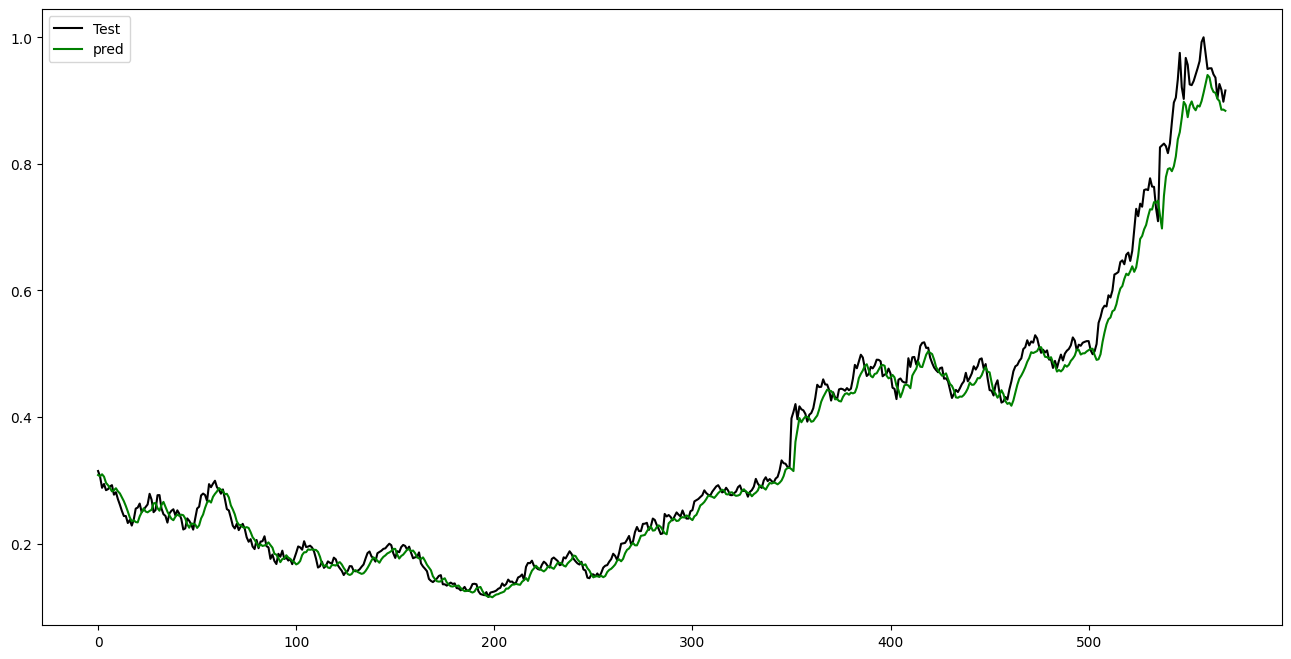

In [13]:
import base64
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

# plt.savefig('plt.jpg')
# with open("plt.jpg", "rb") as image_file:
#     encoded_string = base64.b64encode(image_file.read())

# print(encoded_string)

# base64.b64decode(encoded_string)


In [14]:
#also comprehensions for X
X = np.array([data_set_scaled[i-backcandles:i,:4].copy() for i in range(backcandles,len(data_set_scaled))])
print(X)
print(X.shape)

[[[3.40087110e-04 3.08930413e-04 3.99544266e-04 3.29195068e-04]
  [3.03462190e-04 2.88335011e-04 3.75410558e-04 3.02569572e-04]
  [3.03462190e-04 3.01207099e-04 3.62003050e-04 3.41297423e-04]
  ...
  [1.15106176e-04 1.10700016e-04 1.98431318e-04 1.63941767e-04]
  [1.30802615e-04 1.08125783e-04 1.79660870e-04 1.59069680e-04]
  [1.22954395e-04 2.11102485e-04 2.09157197e-04 2.56516446e-04]]

 [[3.03462190e-04 2.88335011e-04 3.75410558e-04 3.02569572e-04]
  [3.03462190e-04 3.01207099e-04 3.62003050e-04 3.41297423e-04]
  [3.68863498e-04 4.04184108e-04 4.37085162e-04 4.30858940e-04]
  ...
  [1.30802615e-04 1.08125783e-04 1.79660870e-04 1.59069680e-04]
  [1.22954395e-04 2.11102485e-04 2.09157197e-04 2.56516446e-04]
  [2.38060883e-04 3.03781639e-04 3.27143464e-04 3.27165320e-04]]

 [[3.03462190e-04 3.01207099e-04 3.62003050e-04 3.41297423e-04]
  [3.68863498e-04 4.04184108e-04 4.37085162e-04 4.30858940e-04]
  [3.95024021e-04 3.83588706e-04 4.61218549e-04 4.06652657e-04]
  ...
  [1.22954395e-04 